In [1]:
import time as time
import datetime as datetime
import pandas as pd
import yfinance as yf
import matplotlib as plt
from backtesting import Strategy
from backtesting.lib import crossover

/usr/local/lib/python3.10/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
#Data set & columns
df = pd.read_csv('/Users/kenyattaclark/code/personal/Algo_trading/out.csv')
columns = ['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trade Count', 'VWAP']
df.columns = columns
df


,Symbol,Date,Open,High,Low,Close,Volume,Trade Count,VWAP
0,BTC/USD,2023-05-13 17:20:00+00:00,26856.03,26856.53,26846.00,26855.82,0.66554,19.0,26849.125703
1,BTC/USD,2023-05-13 17:21:00+00:00,26855.82,26857.60,26855.82,26857.48,0.01251,19.0,26856.887434
2,BTC/USD,2023-05-13 17:22:00+00:00,26857.48,26862.47,26840.41,26850.40,1.63590,76.0,26848.511080
3,BTC/USD,2023-05-13 17:32:00+00:00,26861.14,26861.14,26861.14,26861.14,0.02077,1.0,26861.140000
4,BTC/USD,2023-05-13 17:33:00+00:00,26852.12,26858.31,26843.62,26843.62,0.75000,31.0,26850.593458
5,BTC/USD,2023-05-13 17:34:00+00:00,26843.52,26843.52,26830.32,26836.18,0.85400,37.0,26834.429816
6,BTC/USD,2023-05-13 17:35:00+00:00,26833.31,26845.02,26826.06,26835.95,0.74925,29.0,26836.463915


In [3]:
#set the date to the index to replace numerical list with dates
#helps with graphing and backtesting
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Symbol,Date,Open,High,Low,Close,Volume,Trade Count,VWAP
2023-05-13 17:20:00+00:00,BTC/USD,2023-05-13 17:20:00+00:00,26856.03,26856.53,26846.00,26855.82,0.66554,19.0,26849.125703
2023-05-13 17:21:00+00:00,BTC/USD,2023-05-13 17:21:00+00:00,26855.82,26857.60,26855.82,26857.48,0.01251,19.0,26856.887434
2023-05-13 17:22:00+00:00,BTC/USD,2023-05-13 17:22:00+00:00,26857.48,26862.47,26840.41,26850.40,1.63590,76.0,26848.511080
2023-05-13 17:32:00+00:00,BTC/USD,2023-05-13 17:32:00+00:00,26861.14,26861.14,26861.14,26861.14,0.02077,1.0,26861.140000
2023-05-13 17:33:00+00:00,BTC/USD,2023-05-13 17:33:00+00:00,26852.12,26858.31,26843.62,26843.62,0.75000,31.0,26850.593458
2023-05-13 17:34:00+00:00,BTC/USD,2023-05-13 17:34:00+00:00,26843.52,26843.52,26830.32,26836.18,0.85400,37.0,26834.429816
2023-05-13 17:35:00+00:00,BTC/USD,2023-05-13 17:35:00+00:00,26833.31,26845.02,26826.06,26835.95,0.74925,29.0,26836.463915


In [4]:
#fit the data frame columns to the backtesting df format
df.drop('Date', inplace=True, axis=1)
df.drop('Symbol', inplace=True, axis=1)
df.drop('Trade Count', inplace=True, axis=1)
df.drop('VWAP', inplace=True, axis=1)
df

,Open,High,Low,Close,Volume
2023-05-13 17:20:00+00:00,26856.03,26856.53,26846.00,26855.82,0.66554
2023-05-13 17:21:00+00:00,26855.82,26857.60,26855.82,26857.48,0.01251
2023-05-13 17:22:00+00:00,26857.48,26862.47,26840.41,26850.40,1.63590
2023-05-13 17:32:00+00:00,26861.14,26861.14,26861.14,26861.14,0.02077
2023-05-13 17:33:00+00:00,26852.12,26858.31,26843.62,26843.62,0.75000
2023-05-13 17:34:00+00:00,26843.52,26843.52,26830.32,26836.18,0.85400
2023-05-13 17:35:00+00:00,26833.31,26845.02,26826.06,26835.95,0.74925


STOCHASTIC OSCILLATOR

In [8]:
 #OSCILLATOR FORMULA

#14 day low average 
L14 = df['Low'].rolling(14).min()
H14 = df['High'].rolling(14).max()
    
#formula variables 
C = df['Close']
K = ((C - L14) * 100 / (H14 - L14))

Dvalue = K.rolling(3).mean()   

In [9]:
#BUY AND SELL SIGNAL
#finding values less than 20 and more than 80
osell = Dvalue.loc[Dvalue>80]
obuy = Dvalue.loc[Dvalue<20]


<AxesSubplot: >

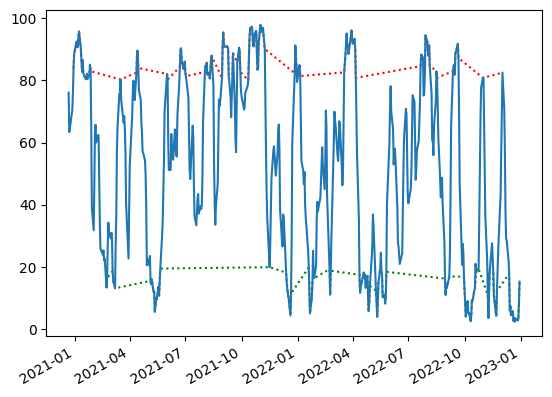

In [10]:
#Sell Signal
osell.plot(color='red', linestyle='dotted')

#Buy Signal
obuy.plot(color='green', linestyle='dotted')
Dvalue.plot()
##df['close'].plot()


MACD

In [18]:
#Calculates divergence of stock price momentum 

exp1 = df['Close'].ewm(span=12).mean()
exp2 = df['Close'].ewm(span=26).mean() 
macd = exp1 - exp2
signal = macd.ewm(span=9).mean()
signal

2020-12-01     0.000000
2020-12-02    -0.066227
2020-12-03     0.002707
2020-12-04     0.092639
2020-12-07     0.338612
                ...    
2022-12-23   -13.664886
2022-12-27   -14.746507
2022-12-28   -15.797212
2022-12-29   -16.592110
2022-12-30   -17.125488
Name: Close, Length: 525, dtype: float64

In [19]:
#need to find a way to select values where MACD is separated from the
#the signal by a difference of +-3

msell = macd.loc[macd>signal]
mbuy = macd.loc[macd<signal]
msell

2020-12-03    0.101972
2020-12-04    0.268187
2020-12-07    0.919503
2020-12-08    1.409487
2020-12-09    1.013875
                ...   
2022-12-06   -7.821881
2022-12-07   -8.228116
2022-12-08   -8.500485
2022-12-09   -8.169487
2022-12-12   -8.712899
Name: Close, Length: 282, dtype: float64

<AxesSubplot: >

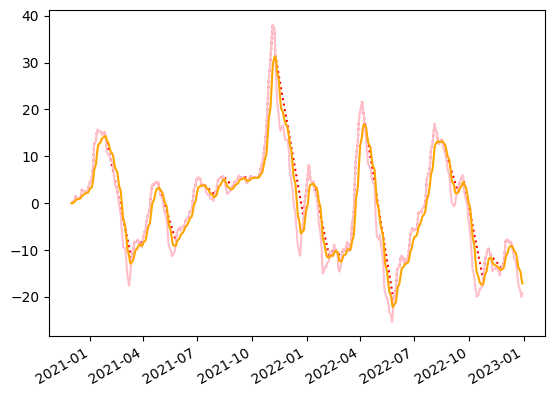

In [17]:
#Plotting Variables
msell.plot(color='red', linestyle='dotted')
#mbuy.plot(color='green', linestyle='dotted')
macd.plot(color='pink')
signal.plot(color='orange')
#df['close'].plot(secondary_y=True)


Bollinger Bands

In [14]:
#BB formula and variables
ma_30 = df['Close'].rolling(window=30).mean()
std_20 = df['Close'].rolling(window=20).std() 
upper = (ma_30 + 2*std_20)
lower = (ma_30 - 2*std_20)


In [15]:
#selecting dates and values where the price is greater than the upper
#and less than the lower
bsell = df['Close'].loc[df['Close']>upper]
bbuy = df['Close'].loc[df['Close']<lower]


<AxesSubplot: >

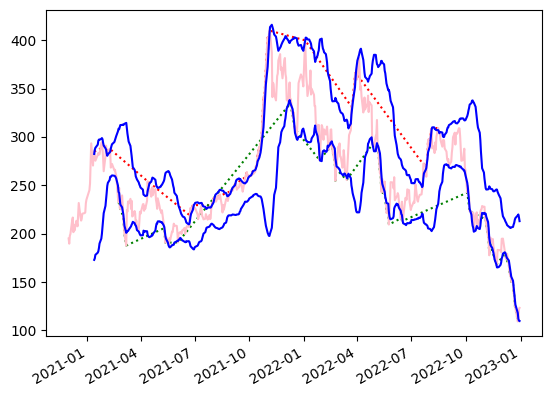

In [16]:
#Plotting buy and sell signals
bsell.plot(color='red', linestyle='dotted')
bbuy.plot(color='green', linestyle='dotted')
df['Close'].plot(color='pink')

#Graph
upper.plot(color='blue')
lower.plot(color='blue')
